### Chemical Oscillations: Nickel dissolution in strong sulfuric acid solution

<bound method _AxesBase.get_xticks of <matplotlib.axes._subplots.AxesSubplot object at 0x10d6b0278>>
<bound method _AxesBase.get_xticks of <matplotlib.axes._subplots.AxesSubplot object at 0x10d1e4668>>
<bound method _AxesBase.get_xticks of <matplotlib.axes._subplots.AxesSubplot object at 0x10cdf6e80>>


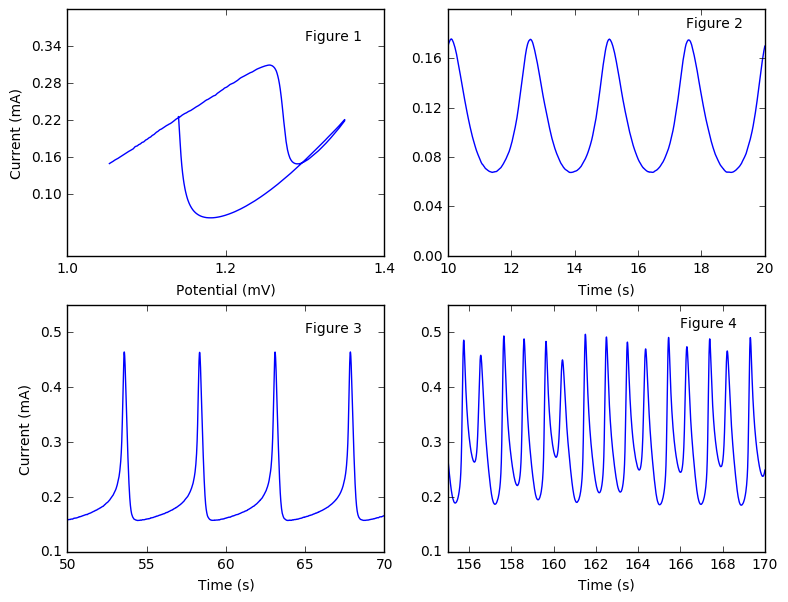

In [33]:
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
    
def filter_data(filename):
    
    data=np.loadtxt(filename)
    data=savgol_filter(data, 31, 2,axis=0)
    return data
   

def get_DataFrame(data,colIndex):
    
    dar = 200 #data acquisition rate
    index = np.divide(np.arange(len(data)),dar)
    index = np.divide(np.arange(len(data)),dar)      
    dataFrame = pd.DataFrame(data[:,colIndex],index,columns = ['current'])
    dataFrame.index.name = 'time'
    
    return dataFrame
        
def plot_timeSeries(dataFrame,timeRange,objPosition,axes,
                    ylimit,ytick,xlabel,ylabel,fglabel):
    
    objrow=objPosition[0]
    objcol=objPosition[1]
    timeStart = timeRange[0]
    timeEnd = timeRange[1]
    ts=dataFrame['current'][timeStart:timeEnd].plot(ax=axes[objrow,objcol])
    ts.set_xlabel(xlabel)
    ts.set_ylabel(ylabel)
    ts.text(fglabel[0],fglabel[1],fglabel[2])
    ts.set_ylim(ylimit)
    ts.set_yticks(ytick)
    
def main():
    filePath="data/"
    filetype=".dat"
    fileName=['m092111_1','m061011_1','m112410_1']
    cv = [0,0]
    simple=[0,1]
    relax=[1,0]
    chaos=[1,1]
    osciType=[simple,relax,chaos]
    tSimple=[10,20]
    tRelax =[50,70]
    tChaos =[155,170]
    timeRange=[tSimple,tRelax,tChaos]
    volRange = [1,1.4]       
    ylimit=[(0.04,0.2),(0.1,0.55),(0.1,0.55)]
    yticks=[np.linspace(0.0, 0.2, num=5,endpoint=False),
            np.linspace(0.1, 0.6, num=5,endpoint=False),
            np.linspace(0.1, 0.6, num=5,endpoint=False),
            np.linspace(0.1, 0.4, num=5,endpoint=False)]
    figlabel=[[17.5,0.185,'Figure 2'],[65,0.5,'Figure 3'],[166,0.51,'Figure 4']]
    xlabel="Time (s)"
    
    dataCV = filter_data('data/m080510_13.lvm')
    dataFrameCV = pd.DataFrame(
        dataCV[500:len(dataCV)-975,:],columns = ['current','potential'])
    
    fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(9,7))
    cv=dataFrameCV.plot(
        x='potential',y='current',ax=axes[0,0],
        legend=False,xlim=(1,1.4),ylim=(0,0.4),
        xticks=[1,1.2,1.4],yticks=yticks[3])
    cv.set_xlabel("Potential (mV)")
    cv.set_ylabel("Current (mA)")
    cv.text(1.3,0.35,'Figure 1')
        
    for file in fileName:
        index = fileName.index(file)
        data = filter_data(filePath + file + filetype)
        dataFrame = get_DataFrame(data,0)
        if index == 1:
            ylabel="Current (mA)" 
        else: 
            ylabel =""
            
        plot_timeSeries(dataFrame,timeRange[index],osciType[index],
                        axes,ylimit[index],yticks[index],xlabel,ylabel,figlabel[index])
    
if __name__=='__main__':
    main()

* Figure 1: Current vs Potential
* Figure 2: Periodic Oscillation
* Figure 3: Relaxation Oscillation
* Figure 4: Chaotic Oscillation

## Frequency of oscillations

Frequency of Oscillation:  0.399 Hz


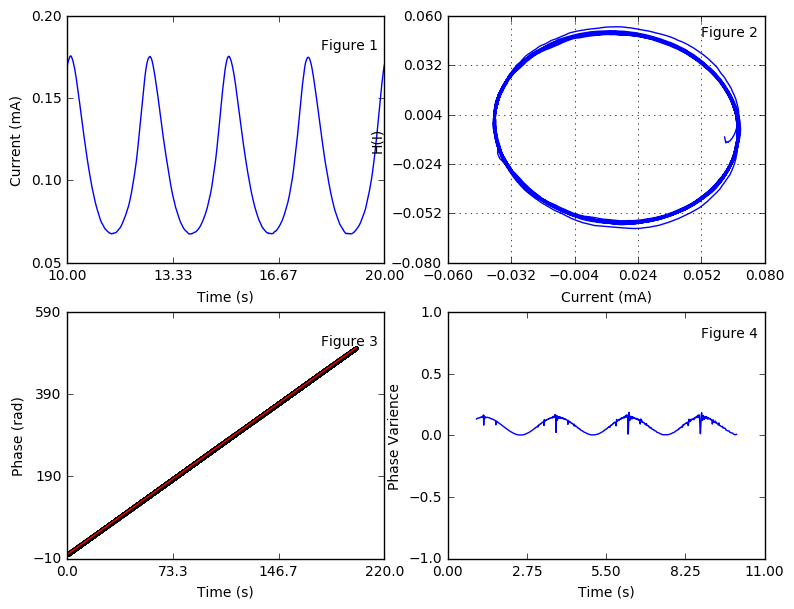

In [7]:

file = 'data/m092111_1.dat'
column=0
data = ts.filter_data(file)
dataFrame = ts.get_DataFrame(data,column)

fig, axes= plt.subplots(nrows=2, ncols=2,figsize=(9,7))

subplot=[0,0]
tsp=ts.plot_timeSeries(dataFrame,axes,subplot)
ts.subplot_design(tsp,label='Figure 1')

tsp=plt.subplot(222)
ts.plot_hilbert(dataFrame,tsp)
ts.subplot_design(tsp,xlabel='Current (mA)',ylabel='H(I)',
                    xlimit=(-0.06,0.08),ylimit=(-0.08, 0.06),divider=6,label='Figure 2')
tsp.grid()

subplot=[1,0]
tsp=ts.plot_phase(dataFrame,axes,subplot)
ts.subplot_design(tsp,xlabel='Time (s)',ylabel='Phase (rad)',
                   xlimit=(0,220),ylimit=(-10, 590),label='Figure 3')

subplot=[1,1]
tsp=ts.plot_detrendPhase(dataFrame,axes,subplot,200)
ts.subplot_design(tsp,xlabel='Time (s)',ylabel='Phase Varience',
                    xlimit=(0,11),ylimit=(-1, 1),divider=5,label='Figure 4')

print('Frequency of Oscillation: ',format(ts.get_frequency(dataFrame,200),'.3f'),'Hz')

* Figure 1: Time series
* Figure 2: Hilbert transformation of the signal
* Figure 3: Phase vs Time
* Figure 4: Phase varience vs Time